# Importing relevent libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd



Check CXR images,



(1024, 1024, 3)

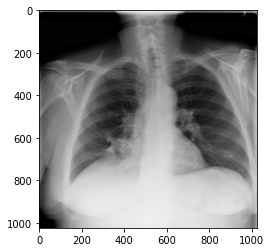

In [2]:
img = cv2.imread('/content/drive/MyDrive/AI_healthcare/dataste/CXR_train_1.png');
plt.imshow(img)
img.shape

image  preprocessing starts,

In [3]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
                rotation_range=10,
                # width_shift_range=0.15,
                # height_shift_range=0.15,
                # shear_range=0.15,
                horizontal_flip=True)

In [4]:
path = "/content/drive/MyDrive/AI_healthcare/normal"
path_ = "/content/drive/MyDrive/AI_healthcare/pneumonia"

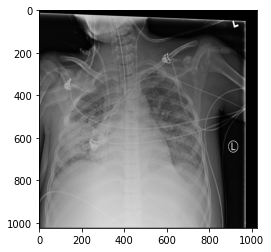

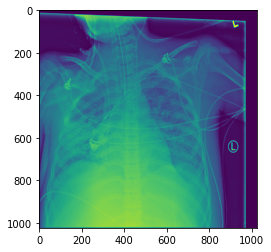

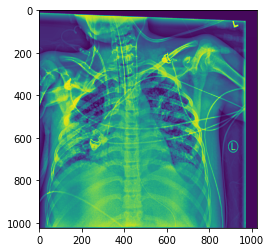

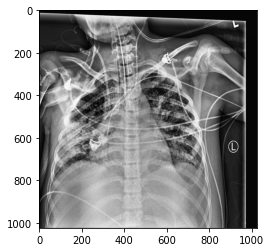

In [5]:

count = 0
for img in (os.listdir(path_)):
    
    bgr_img = cv2.imread(os.path.join(path_,img))
    
    image_bw = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    rbg_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rbg_img)
    plt.show()
    plt.imshow(image_bw)
    plt.show()
  
    clahe = cv2.createCLAHE(clipLimit = 5)
    final_img = clahe.apply(image_bw)

    #Finding ends for croping
    plt.imshow(final_img)
    plt.show()
    img_processed = (np.array(final_img)-6)/255
      
    variance=1
    col_sum = np.sum(img_processed, axis=0)
    row_sum = np.sum(img_processed, axis=1)
    coordx = []
    coordy = []
    for i,j in enumerate(col_sum):
        if j>variance:
            coordx.append(i)
    for i,j in enumerate(row_sum):
        if j>variance:
            coordy.append(i)
    

    final_img = final_img[coordy[0]:coordy[-1]:, coordx[0]:coordx[-1]]
    img_size = 1024
    gray_three = cv2.merge([final_img,final_img,final_img])
    gray_three = cv2.resize(gray_three, (img_size,img_size))
    plt.imshow(gray_three)
    plt.show()
    break
    

In [6]:
import os
Train_images=[]
Train_image_labels=[]

%cd /content/drive/MyDrive/AI_healthcare/normal

for image in os.listdir():
    image = cv2.imread("/content/drive/MyDrive/AI_healthcare/normal"+"/"+image)
    image=cv2.resize(image,(28,28))
    Train_images.append(image)
    Train_image_labels.append(0)

%cd /content/drive/MyDrive/AI_healthcare/pneumonia
for image in os.listdir():
    image = cv2.imread("/content/drive/MyDrive/AI_healthcare/pneumonia"+"/"+image)
    image=cv2.resize(image,(28,28))
    Train_images.append(image)
    Train_image_labels.append(1)
  

/content/drive/MyDrive/AI_healthcare/normal
/content/drive/MyDrive/AI_healthcare/pneumonia


In [7]:
import numpy as np

In [8]:
train_dir = "/content/drive/MyDrive/AI_healthcare/dataste"
test_dir = "/content/drive/MyDrive/AI_healthcare/dataste"
validation_dir = "/content/drive/MyDrive/AI_healthcare/Val"

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
np_X=np.array(Train_images)
np_Y=np.array(Train_image_labels)
xmain,xtest,ymain,ytest=train_test_split(np_X.astype('float32')/255.0 , np_Y,shuffle=True,test_size=30,stratify = np_Y)
xmain = np.array(xmain)
ymain = np.array(ymain)
xtrain,xval,ytrain,yval = train_test_split(xmain.astype('float32')/255.0 ,ymain,shuffle=True,test_size=30,stratify = ymain)
ytrain=np.array(ytrain)
ytest=np.array(ytest)
yval = np.array(yval)

In [11]:
ytrain

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
ytrain=ytrain[np.logical_not(np.isnan(ytrain))] 
ytest=ytest[np.logical_not(np.isnan(ytest))] 
yval=yval[np.logical_not(np.isnan(yval))] 


In [13]:
import warnings

warnings.filterwarnings('ignore')

In [14]:

import tensorflow as tf
import cv2
import numpy as np

from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split


In [15]:
model = Sequential()
#First Convolution Layer
#Learning a total of 32 filters , which is then downsampled by maxpooling layer (2x2)
#kernel_size 3x3 : specifying height and width of 2D convolution window
#padding same: spatial dimensions such that: output value size matches the input volume size
#Relu: activation function used
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Second Convolution Layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(28, 28,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Third Convolution Layer
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(28, 28,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Batch normalization  allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers.
#Flattening : converting 2d array into single long continuous vector
#Dropouts used to avoid overfitting
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
#Dense layers produce the output = activation(dot(input, kernel) + bias)
#Used to predict labels
#Sigmoid activation function used for all dense layers for constructing desired decision boundary
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

#optimizer: Adam, loss:Binary_CrossEntropy, metrics: accuracy
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

#Fitting Training data in Model
history = model.fit(xtrain, ytrain, batch_size=16, epochs=40, validation_split=0.2 ,shuffle = True, verbose=1)


Epoch 1/40
103/103 [==============================] - 5s 41ms/step - loss: 0.6649 - accuracy: 0.6410 - val_loss: 0.6457 - val_accuracy: 0.6528
Epoch 2/40
103/103 [==============================] - 4s 42ms/step - loss: 0.6494 - accuracy: 0.6483 - val_loss: 0.6538 - val_accuracy: 0.6528
Epoch 3/40
103/103 [==============================] - 4s 38ms/step - loss: 0.6529 - accuracy: 0.6483 - val_loss: 0.6459 - val_accuracy: 0.6528
Epoch 4/40
103/103 [==============================] - 4s 40ms/step - loss: 0.6505 - accuracy: 0.6483 - val_loss: 0.6459 - val_accuracy: 0.6528
Epoch 5/40
103/103 [==============================] - 4s 38ms/step - loss: 0.6508 - accuracy: 0.6483 - val_loss: 0.6463 - val_accuracy: 0.6528
Epoch 6/40
103/103 [==============================] - 4s 38ms/step - loss: 0.6516 - accuracy: 0.6483 - val_loss: 0.6462 - val_accuracy: 0.6528
Epoch 7/40
103/103 [==============================] - 4s 38ms/step - loss: 0.6496 - accuracy: 0.6483 - val_loss: 0.6458 - val_accuracy: 0.6528

In [16]:

test_loss,test_acc=model.evaluate(xtest,ytest)
print("TestAccuracy:",test_acc)
print("TestLoss:",test_loss)

1/1 [==============================] - 0s 43ms/step - loss: 0.6572 - accuracy: 0.6333
TestAccuracy: 0.6333333253860474
TestLoss: 0.6572164297103882


In [23]:
#model.save("ProjectModel.h5")
%cd /content/drive/MyDrive
!mkdir -p saved_model
model.save('saved_model/my_model3')

/content/drive/MyDrive


In [24]:
model=tf.keras.models.load_model('/content/drive/MyDrive/saved_model/my_model3')
test_loss,test_acc=model.evaluate(xtest,ytest)
print("TestAccuracy:",test_acc)
print("TestLoss:",test_loss)

1/1 [==============================] - 0s 179ms/step - loss: 0.6840 - accuracy: 0.8000
TestAccuracy: 0.800000011920929
TestLoss: 0.683982253074646


In [25]:
op=np.array(model.predict(xtest))
pred=[]
for i in range(len(op)):
    if op[i]>0.25:
       pred.append(1)
    else:
       pred.append(0)
import pandas as pd

df=pd.DataFrame({"pred":pred,"ytest":ytest})
df.to_csv("/content/drive/MyDrive/test_pred.csv")

1/1 [==============================] - 0s 127ms/step
